In [2]:
import pandas as pd

In [3]:
input_path = './data/principal_component.xls'
output_path = './tmp/dimention_reducted.xls'

In [6]:
data = pd.read_excel(input_path, header=None)

In [8]:
data

,0,1,2,3,4,5,6,7
0,40.4,24.7,7.2,6.1,8.3,8.7,2.442,20.0
1,25.0,12.7,11.2,11.0,12.9,20.2,3.542,9.1
2,13.2,3.3,3.9,4.3,4.4,5.5,0.578,3.6
3,22.3,6.7,5.6,3.7,6.0,7.4,0.176,7.3
4,34.3,11.8,7.1,7.1,8.0,8.9,1.726,27.5
5,35.6,12.5,16.4,16.7,22.8,29.3,3.017,26.6
6,22.0,7.8,9.9,10.2,12.6,17.6,0.847,10.6
7,48.4,13.4,10.9,9.9,10.9,13.9,1.772,17.8
8,40.6,19.1,19.8,19.0,29.7,39.6,2.449,35.8
9,24.8,8.0,9.8,8.9,11.9,16.2,0.789,13.7


In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA()
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca.components_, pca.components_.shape

(array([[ 0.56788461,  0.2280431 ,  0.23281436,  0.22427336,  0.3358618 ,
          0.43679539,  0.03861081,  0.46466998],
        [ 0.64801531,  0.24732373, -0.17085432, -0.2089819 , -0.36050922,
         -0.55908747,  0.00186891,  0.05910423],
        [-0.45139763,  0.23802089, -0.17685792, -0.11843804, -0.05173347,
         -0.20091919, -0.00124421,  0.80699041],
        [-0.19404741,  0.9021939 , -0.00730164, -0.01424541,  0.03106289,
          0.12563004,  0.11152105, -0.3448924 ],
        [-0.06133747, -0.03383817,  0.12652433,  0.64325682, -0.3896425 ,
         -0.10681901,  0.63233277,  0.04720838],
        [ 0.02579655, -0.06678747,  0.12816343, -0.57023937, -0.52642373,
          0.52280144,  0.31167833,  0.0754221 ],
        [-0.03800378,  0.09520111,  0.15593386,  0.34300352, -0.56640021,
          0.18985251, -0.69902952,  0.04505823],
        [-0.10147399,  0.03937889,  0.91023327, -0.18760016,  0.06193777,
         -0.34598258, -0.02090066,  0.02137393]]), (8, 8))

In [19]:
acc = pca.explained_variance_ratio_

In [18]:
import matplotlib.pyplot as plt

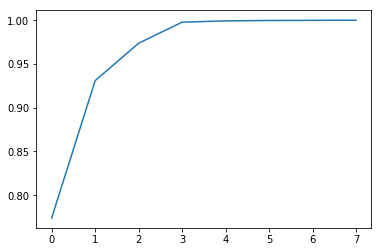

In [20]:
plt.plot(list(range(len(acc))), acc.cumsum())

In [21]:
pca = PCA(3)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
data_rdc = pca.transform(data)

In [23]:
data_rdc

array([[  8.19133694,  16.90402785,   3.90991029],
       [  0.28527403,  -6.48074989,  -4.62870368],
       [-23.70739074,  -2.85245701,  -0.4965231 ],
       [-14.43202637,   2.29917325,  -1.50272151],
       [  5.4304568 ,  10.00704077,   9.52086923],
       [ 24.15955898,  -9.36428589,   0.72657857],
       [ -3.66134607,  -7.60198615,  -2.36439873],
       [ 13.96761214,  13.89123979,  -6.44917778],
       [ 40.88093588, -13.25685287,   4.16539368],
       [ -1.74887665,  -4.23112299,  -0.58980995],
       [-21.94321959,  -2.36645883,   1.33203832],
       [-36.70868069,  -6.00536554,   3.97183515],
       [  3.28750663,   4.86380886,   1.00424688],
       [  5.99885871,   4.19398863,  -8.59953736]])

In [24]:
df_rdc = pd.DataFrame(data_rdc)

In [26]:
df_rdc

,0,1,2
0,8.191337,16.904028,3.909910
1,0.285274,-6.480750,-4.628704
2,-23.707391,-2.852457,-0.496523
3,-14.432026,2.299173,-1.502722
4,5.430457,10.007041,9.520869
5,24.159559,-9.364286,0.726579
6,-3.661346,-7.601986,-2.364399
7,13.967612,13.891240,-6.449178
8,40.880936,-13.256853,4.165394
9,-1.748877,-4.231123,-0.589810


In [27]:
from sklearn.cluster import KMeans

In [28]:
kmodel = KMeans(n_clusters=4, n_jobs=-1)

In [33]:
kmodel.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
clu_df = kmodel.predict(data)

In [36]:
kmodel.fit(df_rdc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
clu_rdc = kmodel.predict(df_rdc)

In [38]:
clu_df

array([1, 3, 0, 0, 1, 2, 3, 1, 2, 3, 0, 0, 1, 1], dtype=int32)

In [39]:
clu_rdc

array([2, 3, 1, 1, 2, 0, 3, 2, 0, 3, 1, 1, 2, 2], dtype=int32)